# Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , UpSampling2D
import keras

## Loading the Dataset

In [2]:
from keras.datasets import mnist

In [3]:
(x_train , _) , (x_test , _) = mnist.load_data()

# Exploratory Data Analysis

## Finding bounds of the image pixel values

In [ ]:
max = -1
min = 1000
for img in x_train :
    for row in img:
        for px in row:
            if max < px :
                max = px
            if min > px :
                min = px
print(min , max)

0 255


In [ ]:
max = -1
min = 1000
for img in x_test :
    for row in img:
        for px in row:
            if max < px :
                max = px
            if min > px :
                min = px
print(min , max)

0 255


## Normalizing dataset

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

### Verifying the normalization

In [197]:
max = -1
min = 1000
for img in x_train :
    for row in img:
        for px in row:
            if max < px :
                max = px
            if min > px :
                min = px
print(min , max)

0.0 1.0


In [198]:
max = -1
min = 1000
for img in x_test :
    for row in img:
        for px in row:
            if max < px :
                max = px
            if min > px :
                min = px
print(min , max)

0.0 1.0


## Taking a look at some of the images

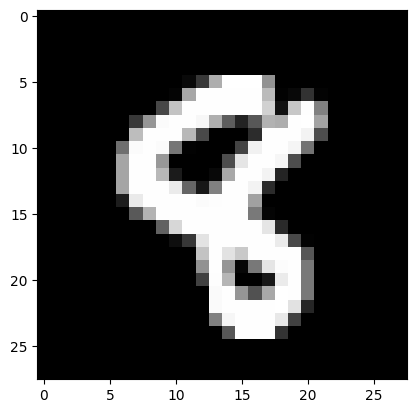

In [5]:
i = np.random.randint(len(x_test))
plt.imshow(x_test[i].reshape(28,28))
plt.gray()

## Reshaping the dataset for the model

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


# Adding Noise to Image

In [8]:
x_train_noisy = x_train + 0.5*np.random.normal(loc = 0.0 , scale = 1.0 , size = x_train.shape)
x_test_noisy = x_test + 0.5*np.random.normal(loc = 0.0 , scale = 1.0 , size = x_test.shape)

In [10]:
x_train_noisy = np.clip(x_train_noisy , 0 , 1)
x_test_noisy = np.clip(x_test_noisy , 0 , 1)

In [11]:
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


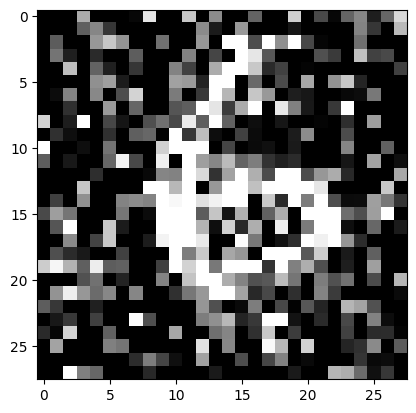

In [12]:
plt.imshow(x_train_noisy[i])

# Model

## Architecture

### Encode and Decode


In [13]:
encoder = Sequential([
    # Encoder Network
    Conv2D(32 , 3 , activation = 'relu' , padding = 'same' , input_shape = (28,28,1)),
    MaxPooling2D(2 , padding = 'same'),
    Conv2D(16 , 3 , activation = 'relu' , padding = 'same'),
    MaxPooling2D(2 , padding = 'same'),
    MaxPooling2D(2 , padding = 'same'),
    Conv2D(16 , 3 , activation = 'relu' , padding = 'same'),
    # MaxPooling2D(2 , padding = 'same'),
])

decoder = Sequential([
    # Decoder Network
    Conv2D(16 , 3 , activation = 'relu' , padding = 'same' , input_shape = (4,4,16)),
    UpSampling2D(7),
    Conv2D(32 , 3 , activation = 'relu' , padding = 'same'),
    # Output Layer
    Conv2D(1 , 3 , activation = 'sigmoid' , padding = 'same')
])

nn = Sequential([
    encoder,
    decoder
])

nn.compile(optimizer = 'adam' , loss = 'binary_crossentropy')
nn.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4, 4, 16)          7264      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         7249      
                                                                 
Total params: 14513 (56.69 KB)
Trainable params: 14513 (56.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Denoiser

In [14]:
model = Sequential([
    # Encoder Network
    Conv2D(32 , 3 , activation = 'relu' , padding = 'same' , input_shape = (28,28,1)),
    MaxPooling2D(2 , padding = 'same'),
    Conv2D(16 , 3 , activation = 'relu' , padding = 'same'),
    MaxPooling2D(2 , padding = 'same'),
    # Decoder Network
    Conv2D(16 , 3 , activation = 'relu' , padding = 'same'),
    UpSampling2D(2),
    Conv2D(32 , 3 , activation = 'relu' , padding = 'same'),
    UpSampling2D(2),
    # Output Layer
    Conv2D(1 , 3 , activation = 'sigmoid' , padding = 'same')
])

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 14, 14, 16)       

## Training

## Encode and Decode

In [15]:
hist = nn.fit(x_train , x_train , epochs = 100 , batch_size = 512 , validation_data = (x_test , x_test))
encoder.save("encoder")
decoder.save("decoder")

Epoch 1/100

118/118 [==============================] - 18s 143ms/step - loss: 0.3282 - val_loss: 0.2075
Epoch 2/100
118/118 [==============================] - 19s 161ms/step - loss: 0.1852 - val_loss: 0.1716
Epoch 3/100
118/118 [==============================] - 17s 144ms/step - loss: 0.1661 - val_loss: 0.1611
Epoch 4/100
118/118 [==============================] - 18s 149ms/step - loss: 0.1562 - val_loss: 0.1516
Epoch 5/100
118/118 [==============================] - 16s 134ms/step - loss: 0.1500 - val_loss: 0.1475
Epoch 6/100
118/118 [==============================] - 17s 140ms/step - loss: 0.1463 - val_loss: 0.1460
Epoch 7/100
118/118 [==============================] - 17s 144ms/step - loss: 0.1437 - val_loss: 0.1420
Epoch 8/100
118/118 [==============================] - 20s 168ms/step - loss: 0.1416 - val_loss: 0.1399
Epoch 9/100
118/118 [==============================] - 16s 138ms/step - loss: 0.1400 - val_loss: 0.1384
Epoch 10/100
118/118 [==============================] - 18s 151

INFO:tensorflow:Assets written to: encoder\assets


INFO:tensorflow:Assets written to: decoder\assets


INFO:tensorflow:Assets written to: decoder\assets


## Denoiser

In [16]:
hist_noise = model.fit(x_train_noisy , x_train , epochs = 100 , batch_size = 512 , validation_data = (x_test_noisy , x_test))
model.save("denoiser")

Epoch 1/100
118/118 [==============================] - 14s 115ms/step - loss: 0.3072 - val_loss: 0.1732
Epoch 2/100
118/118 [==============================] - 14s 118ms/step - loss: 0.1535 - val_loss: 0.1384
Epoch 3/100
118/118 [==============================] - 13s 113ms/step - loss: 0.1339 - val_loss: 0.1279
Epoch 4/100
118/118 [==============================] - 14s 116ms/step - loss: 0.1265 - val_loss: 0.1231
Epoch 5/100
118/118 [==============================] - 14s 122ms/step - loss: 0.1228 - val_loss: 0.1203
Epoch 6/100
118/118 [==============================] - 14s 117ms/step - loss: 0.1200 - val_loss: 0.1175
Epoch 7/100
118/118 [==============================] - 14s 115ms/step - loss: 0.1178 - val_loss: 0.1158
Epoch 8/100
118/118 [==============================] - 13s 112ms/step - loss: 0.1160 - val_loss: 0.1144
Epoch 9/100
118/118 [==============================] - 13s 112ms/step - loss: 0.1146 - val_loss: 0.1126
Epoch 10/100
118/118 [==============================] - 13s 113m

INFO:tensorflow:Assets written to: denoiser\assets


# Results

## Visualise Compression

In [ ]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
pred.shape

(10000, 28, 28, 1)

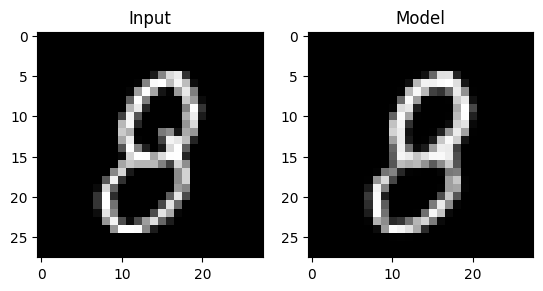

In [ ]:
i = np.random.randint(len(x_test))
plt.subplot(1,2,1)
plt.imshow(x_test[i].reshape(28,28))
plt.title("Input")

plt.subplot(1,2,2)
plt.imshow(pred[i].reshape(28,28))
plt.title("Model")

plt.gray()

## Visualise Denoising

In [ ]:
pred = model.predict(x_test_noisy)

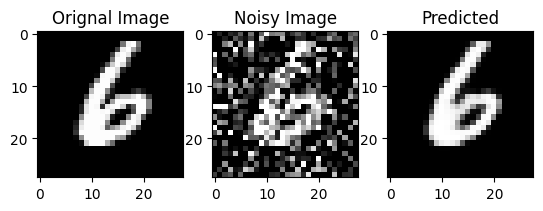

In [ ]:
i = np.random.randint(len(x_test_noisy))
plt.subplot(1,3,1)
plt.imshow(x_test[i].reshape(28,28))
plt.title("Orignal Image")

plt.subplot(1,3,2)
plt.imshow(x_test_noisy[i].reshape(28,28))
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow(pred[i].reshape(28,28))
plt.title("Predicted")

plt.gray()

## Visualising Encoding , Decoding and Denoising

In [9]:
encoder = keras.models.load_model("encoder")
decoder = keras.models.load_model("decoder")
denoise = keras.models.load_model("denoiser")

In [12]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                        

In [14]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 7249 (28.32 KB)
Trainable params: 7249 (28.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
denoise.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 14, 14, 16)       

In [10]:
pred = encoder.predict(x_test)
decoded = decoder.predict(pred)
denoised = denoise.predict(decoded)

313/313 [==============================] - 1s 3ms/step


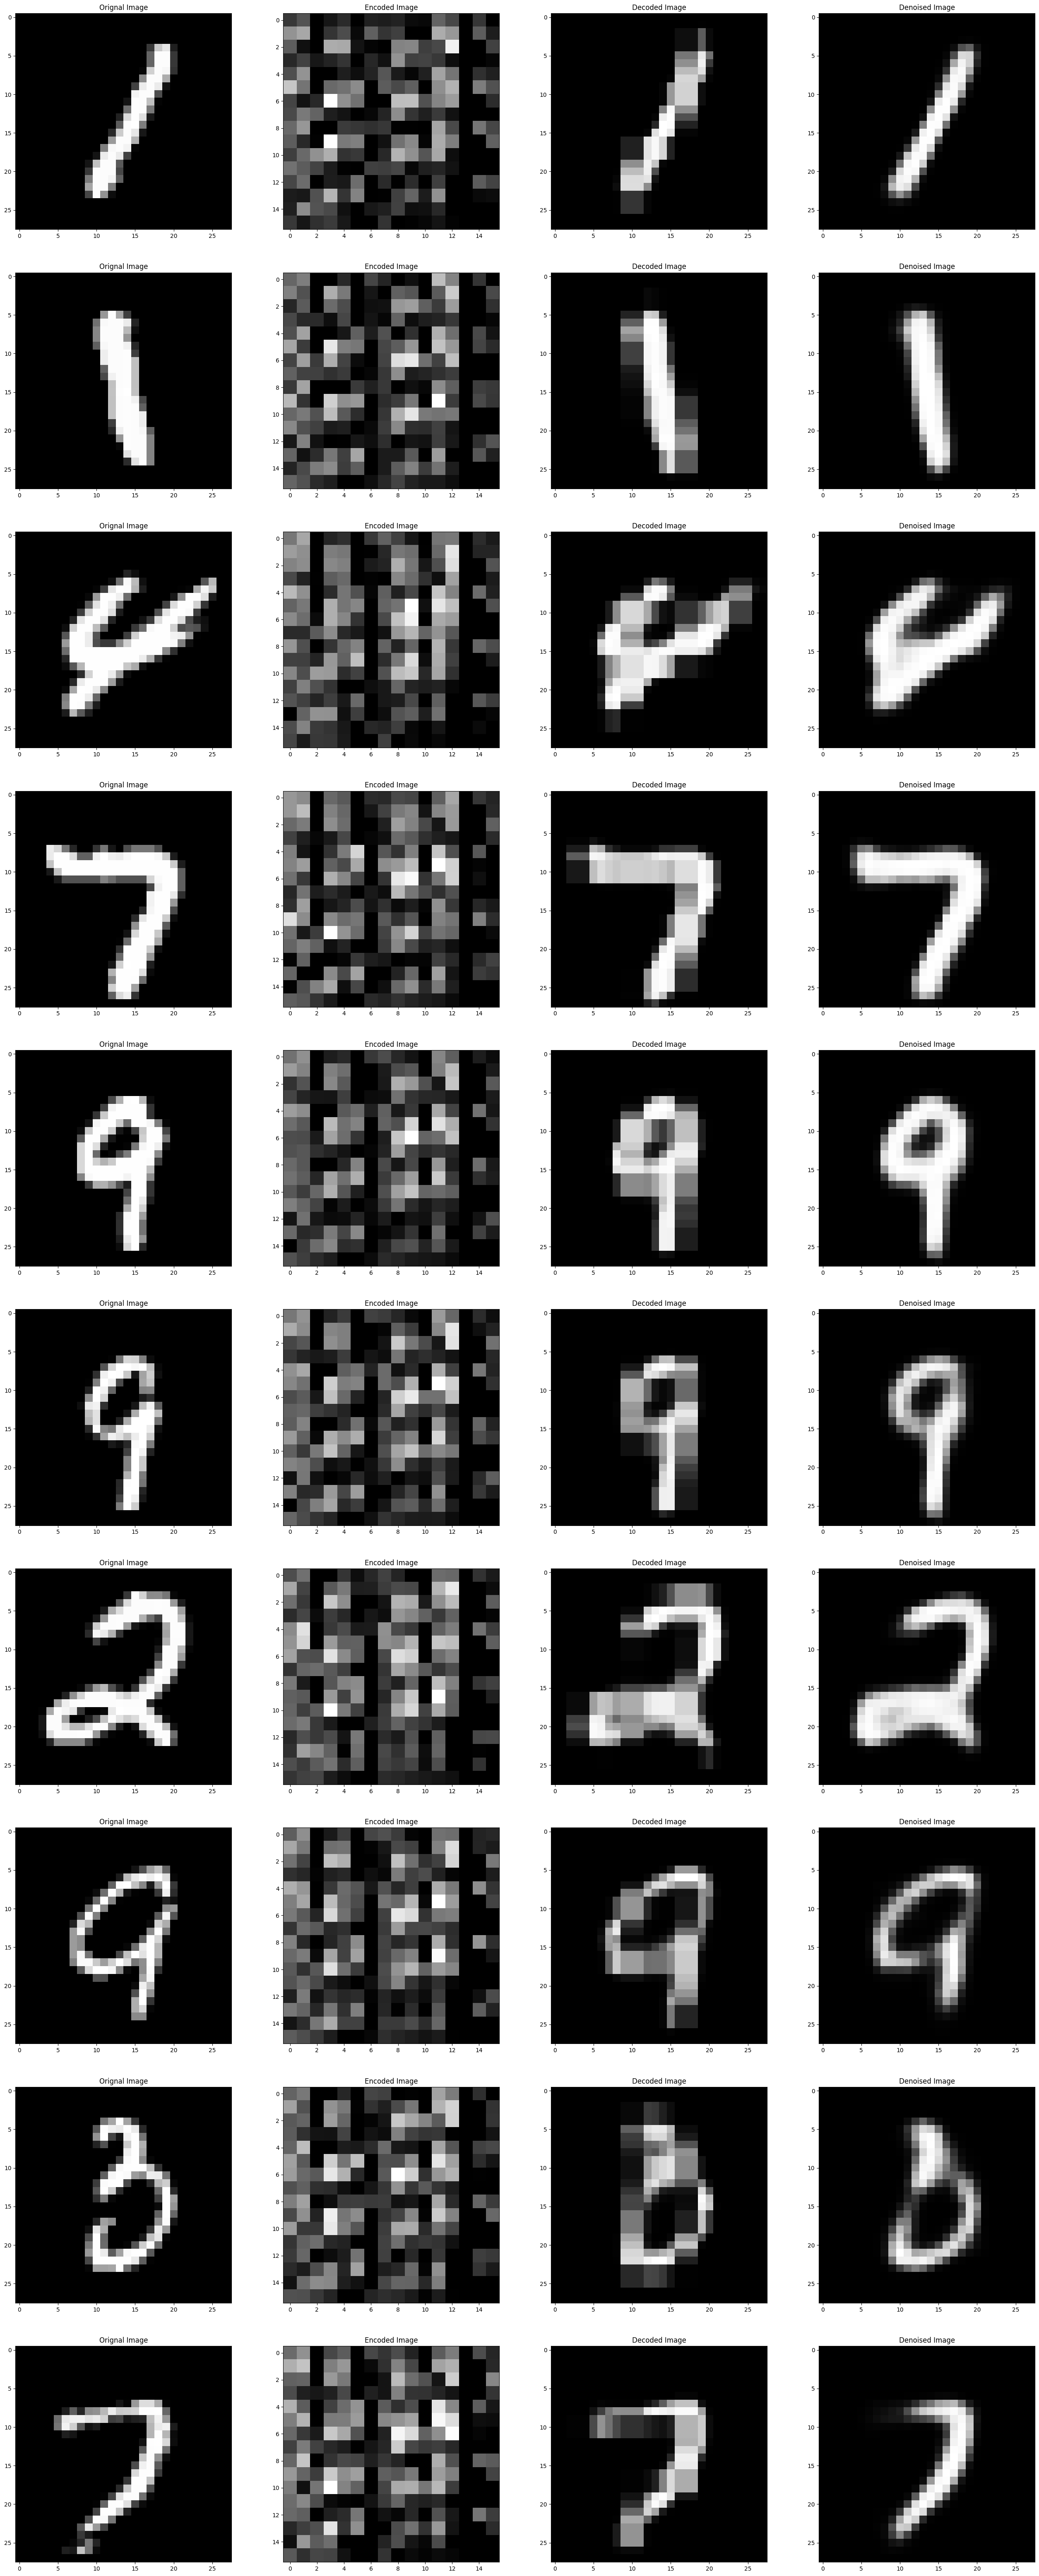

In [11]:
n = 10
fig = plt.figure(figsize=(32 , 80))
for it in range(10):
    # Orignal Image
    i = np.random.randint(len(x_test))
    plt.subplot(n,4,it*4+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Orignal Image")
    # Encoded Data
    plt.subplot(n,4,it*4+2)
    plt.imshow(pred[i].reshape(16,16))
    plt.title("Encoded Image")
    # Decoded Image
    plt.subplot(n,4,it*4+3)
    plt.title("Decoded Image")
    plt.imshow(decoded[i].reshape(28,28))
    # Denoised Image
    plt.subplot(n,4,it*4+4)
    plt.title("Denoised Image")
    plt.imshow(denoised[i].reshape(28,28))
plt.show()

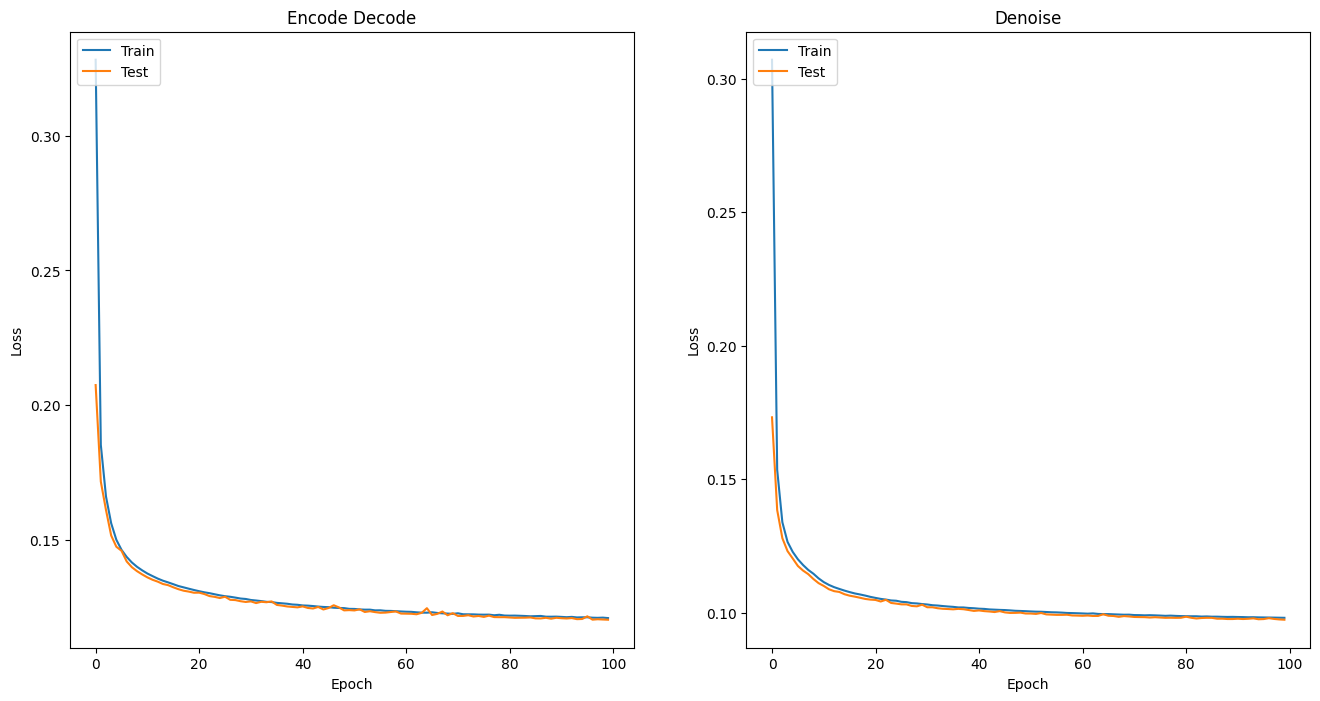

In [19]:
fig = plt.figure(figsize=(16 , 8))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Encode Decode')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(hist_noise.history['loss'])
plt.plot(hist_noise.history['val_loss'])
plt.title('Denoise')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()